# Evaluation of off-target binding of generated molecules on homologous receptors

In [1]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tinymolecule.utils.docking import generate_logs_table

## Data loading

In [2]:
plots_path = Path("/Users/Munchic/Developer/Capstone/tinymolecule/data/plots")

BASE_DIR = Path("../data/pdb_out")

logs_ccr5 = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_valid_45e/logs/summary.csv")
logs_ccr5_y3d = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_y3d_valid_45e/logs/summary.csv")
logs_ccr5_g301e = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_g301e_valid_45e/logs/summary.csv")
logs_ccr5_g202e = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_g202e_valid_45e/logs/summary.csv")
logs_ccr5_i253f = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_i253f_valid_45e/logs/summary.csv")


total_molecules = len(logs_ccr5)
logs_ccr5.head()  # preview

,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,uuid
0,0,-10.1,-9.7,-9.6,-9.3,-9.0,-8.9,-8.7,-8.7,-8.5,...,3.376,3.601,10.824,9.792,11.498,10.163,11.051,7.956,10.155,23648f4b
1,1,-11.0,-10.9,-10.7,-10.6,-10.4,-10.3,-10.3,-10.2,-10.1,...,2.010,5.053,2.328,3.817,9.623,4.844,3.776,10.807,2.042,0dc7c743
2,2,-10.2,-9.7,-9.7,-9.3,-9.2,-9.2,-9.2,-9.1,-9.0,...,3.338,3.650,9.134,7.707,3.899,3.883,7.022,8.690,8.894,024e3700
3,3,-8.5,-8.2,-8.2,-8.1,-7.9,-7.7,-7.4,-7.3,-7.3,...,3.805,1.809,1.528,2.556,6.014,8.736,6.331,8.252,2.503,fdbbf6e6
4,4,-10.3,-9.4,-9.4,-9.3,-9.3,-8.8,-8.7,-8.5,-8.4,...,2.573,3.747,2.590,3.866,3.847,8.921,4.950,4.934,4.918,2b6194b9


## Data validation
### Make sure that CCR5 best binding modes don't have any outliers

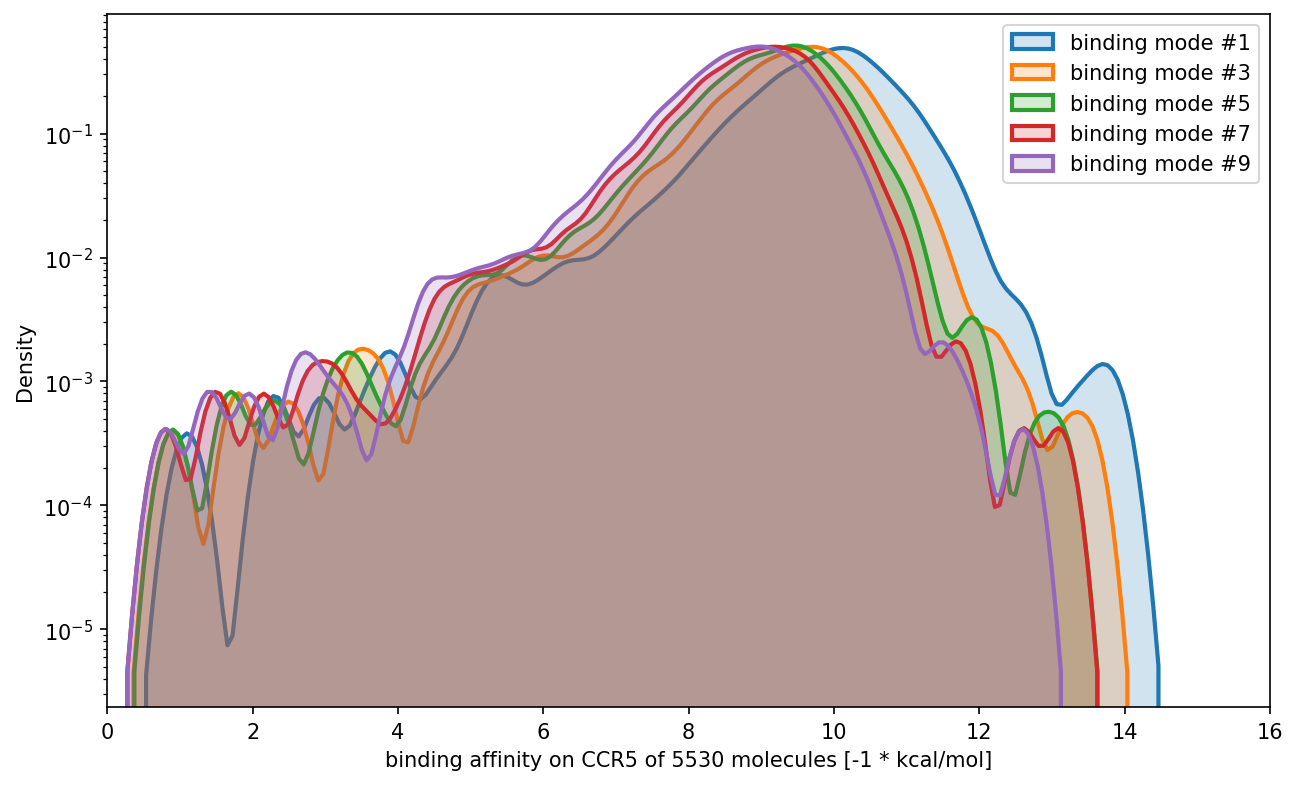

In [11]:
plt.style.use('default')
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_3"] * (-1), linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_5"] * (-1), linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_7"] * (-1), linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_9"] * (-1), linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.yscale("log")
plt.xlim(0, 16)
plt.xlabel(f"binding affinity on CCR5 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

### CCR2 sanity check

In [15]:
plt.figure(figsize=(16, 8), dpi=150)

sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_3"] * (-1), linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_5"] * (-1), linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_7"] * (-1), linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_9"] * (-1), linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, 16)
plt.xlabel(f"binding affinity on CCR2 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

NameError: name 'logs_ccr2' is not defined

<Figure size 2400x1200 with 0 Axes>

## Comparison
### Best binding mode

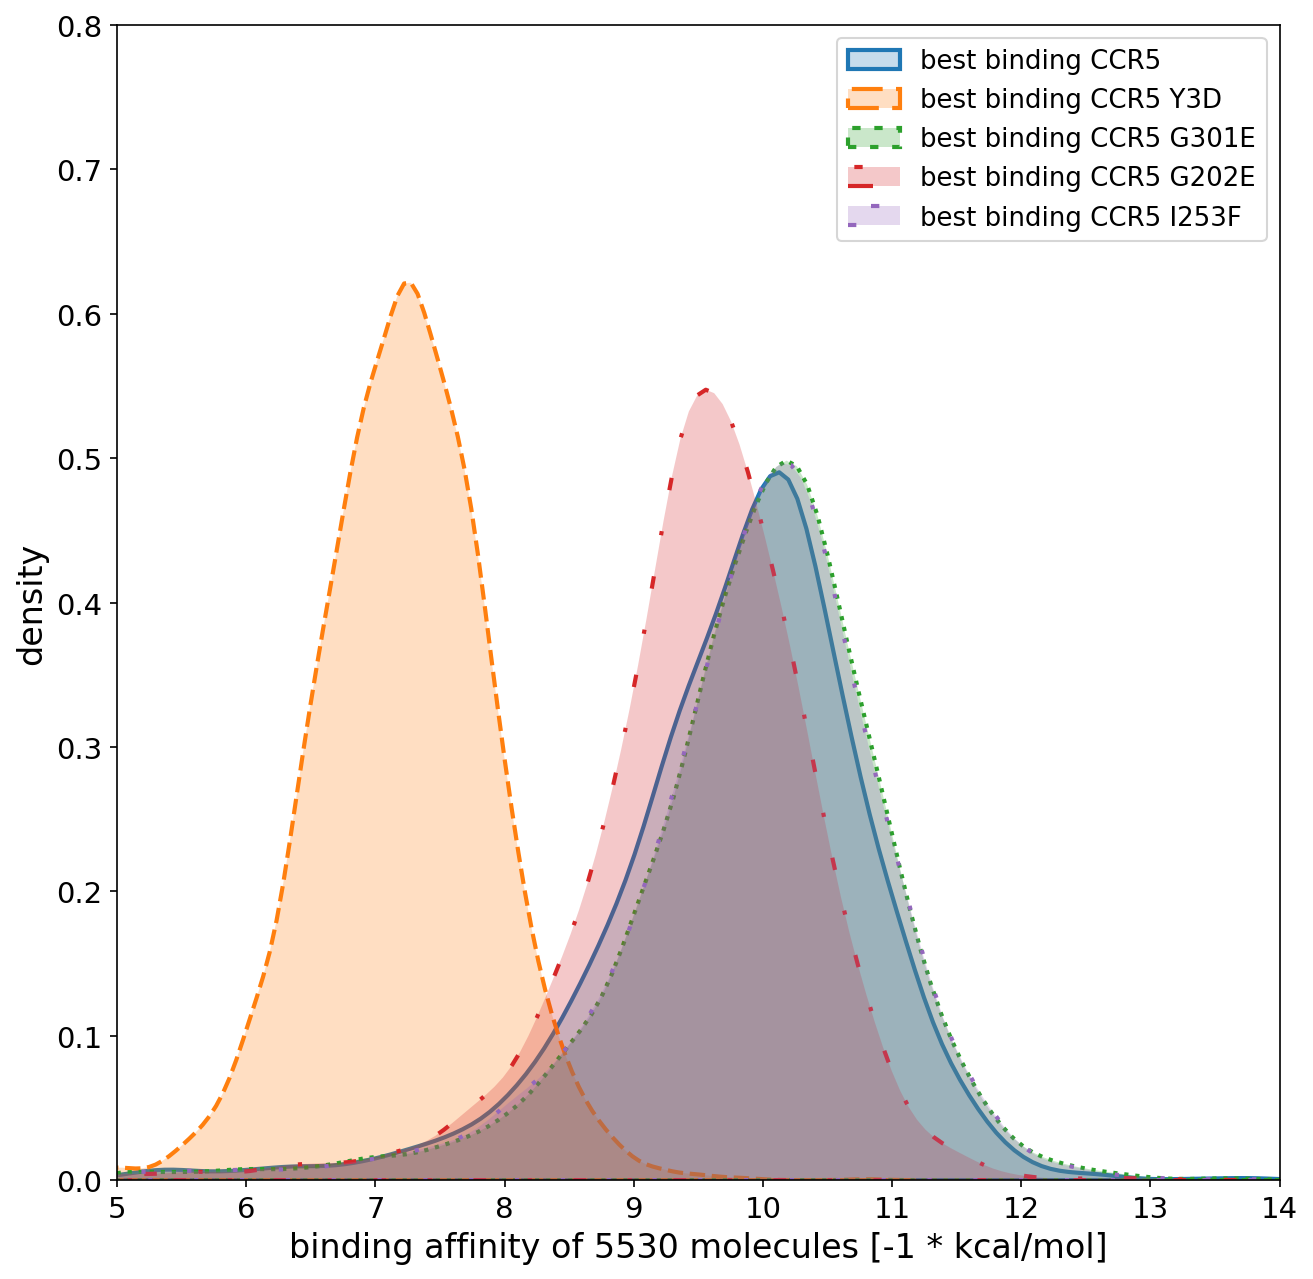

In [4]:
plt.style.use('default')
plt.figure(figsize=(10, 10), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5", fill=True)
sns.kdeplot(data=logs_ccr5_y3d["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 Y3D", fill=True, linestyle="--")
sns.kdeplot(data=logs_ccr5_g301e["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 G301E", fill=True, linestyle=":")
sns.kdeplot(data=logs_ccr5_g202e["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 G202E", fill=True, linestyle=(0, (3, 10, 1, 10)))
sns.kdeplot(data=logs_ccr5_i253f["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 I253F", fill=True, linestyle=(0, (1, 10)))

plt.ylim(0, 0.8)
plt.xlim(5, 14)
plt.ylabel("density", size=16)
plt.xlabel(f"binding affinity of {total_molecules} molecules [-1 * kcal/mol]", size=16)
plt.legend(fontsize=12.5)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(plots_path / "baff-ccr5-vs-variants.png")
plt.show()

### Correlation of binding affinity

In [5]:
combined_logs = pd.merge(logs_ccr5_g301e, pd.merge(logs_ccr5, logs_ccr5_y3d, on="uuid"), on="uuid")
combined_logs.head()

,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_1_y,best_dist_rmsd_ub_2_y,best_dist_rmsd_ub_3_y,best_dist_rmsd_ub_4_y,best_dist_rmsd_ub_5_y,best_dist_rmsd_ub_6_y,best_dist_rmsd_ub_7_y,best_dist_rmsd_ub_8_y,best_dist_rmsd_ub_9_y,best_dist_rmsd_ub_10_y
0,0,-9.8,-9.8,-9.6,-9.5,-9.5,-9.4,-9.2,-9.1,-8.9,...,0.0,1.772,10.279,10.407,22.283,9.851,24.716,10.065,9.940,11.070
1,1,-11.2,-10.9,-10.6,-10.6,-10.4,-10.2,-10.1,-10.0,-10.0,...,0.0,11.014,10.113,10.503,9.899,26.807,27.696,27.104,27.718,25.874
2,2,-10.4,-10.4,-10.0,-9.9,-9.9,-9.8,-9.7,-9.7,-9.6,...,0.0,24.950,6.842,24.134,7.271,24.470,6.972,27.405,27.384,27.815
3,3,-8.6,-8.2,-7.8,-7.4,-7.3,-7.1,-7.1,-7.0,-7.0,...,0.0,24.612,25.577,8.681,24.708,3.495,25.735,25.593,25.375,25.170
4,4,-9.9,-9.5,-9.4,-9.2,-9.2,-9.1,-9.0,-8.8,-8.6,...,0.0,26.638,3.577,7.453,26.104,7.878,3.197,26.770,27.607,26.104


/Users/Munchic/miniconda3/envs/tinymolecule/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 660x660 with 0 Axes>

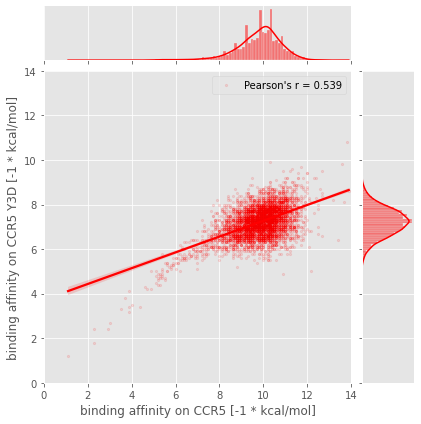

In [7]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1_y"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="red", scatter_kws={"alpha": 0.1, "s": 5})

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR5 Y3D [-1 * kcal/mol]")
plt.ylim(0, 14)
plt.xlim(0, 14)
plt.legend()
plt.show()

/Users/Munchic/miniconda3/envs/tinymolecule/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 660x660 with 0 Axes>

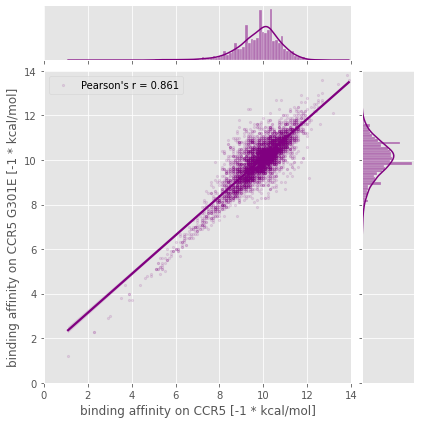

In [8]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="purple", scatter_kws={"alpha": 0.1, "s": 5})

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR5 G301E [-1 * kcal/mol]")
plt.ylim(0, 14)
plt.xlim(0, 14)
plt.legend()
plt.show()

In [31]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1_z"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="red")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR1 [-1 * kcal/mol]")
plt.legend()
plt.show()

KeyError: 'affin_kcal_mol-1_1_z'

<Figure size 660x660 with 0 Axes>

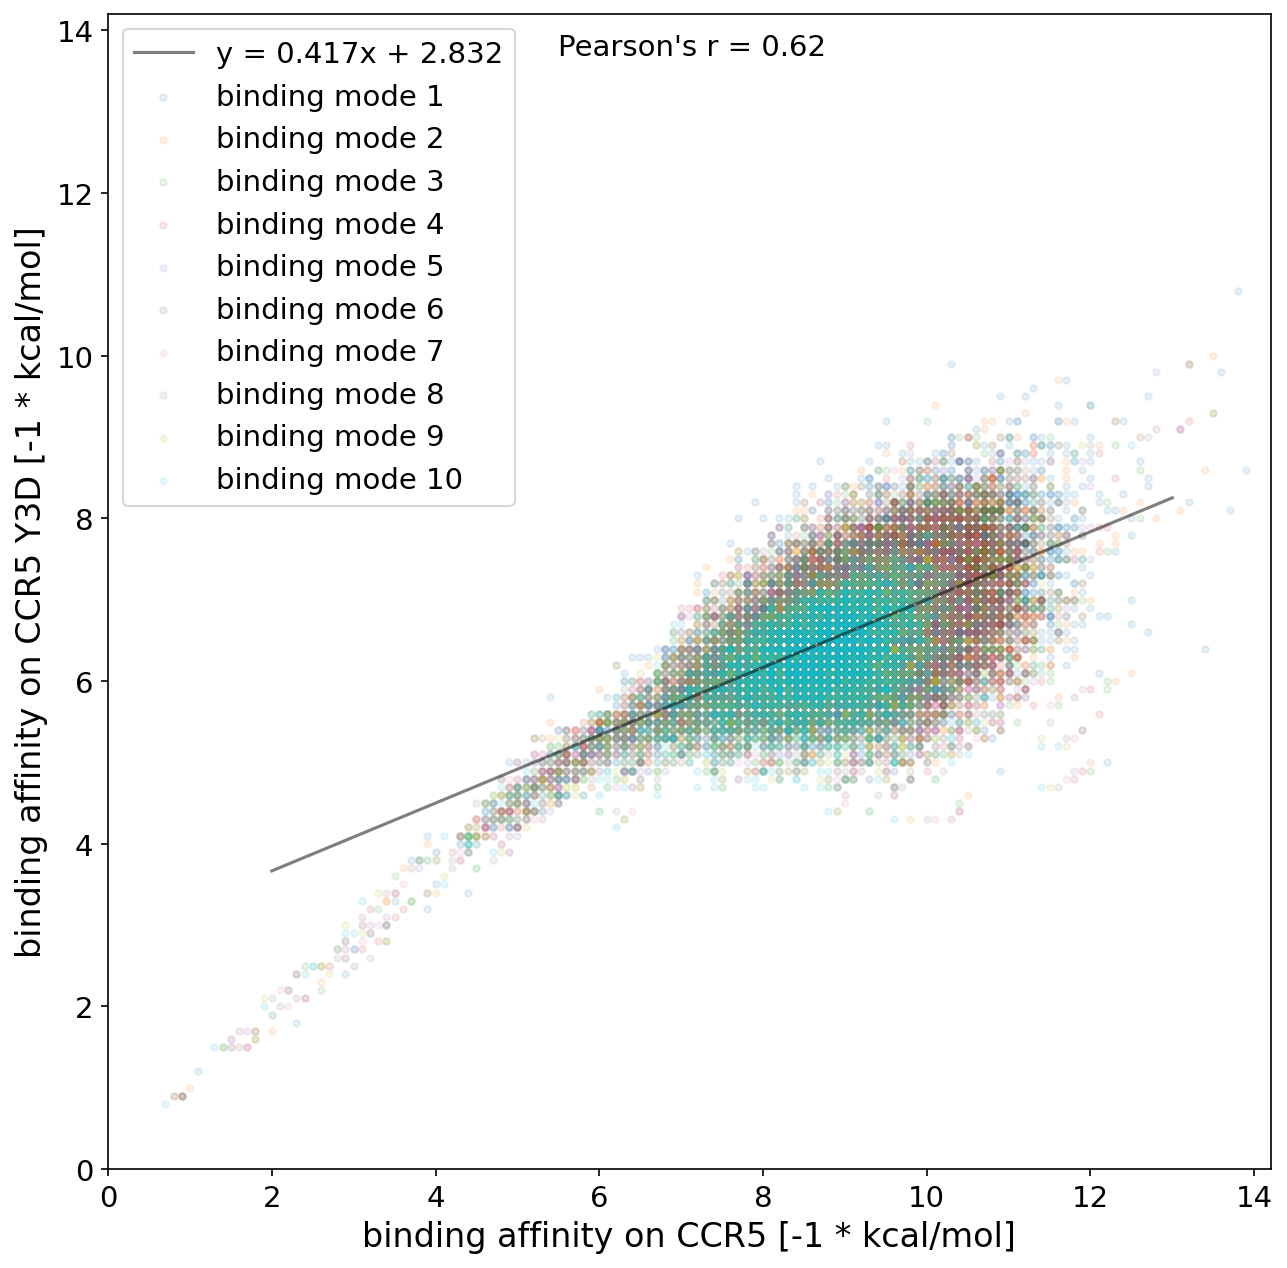

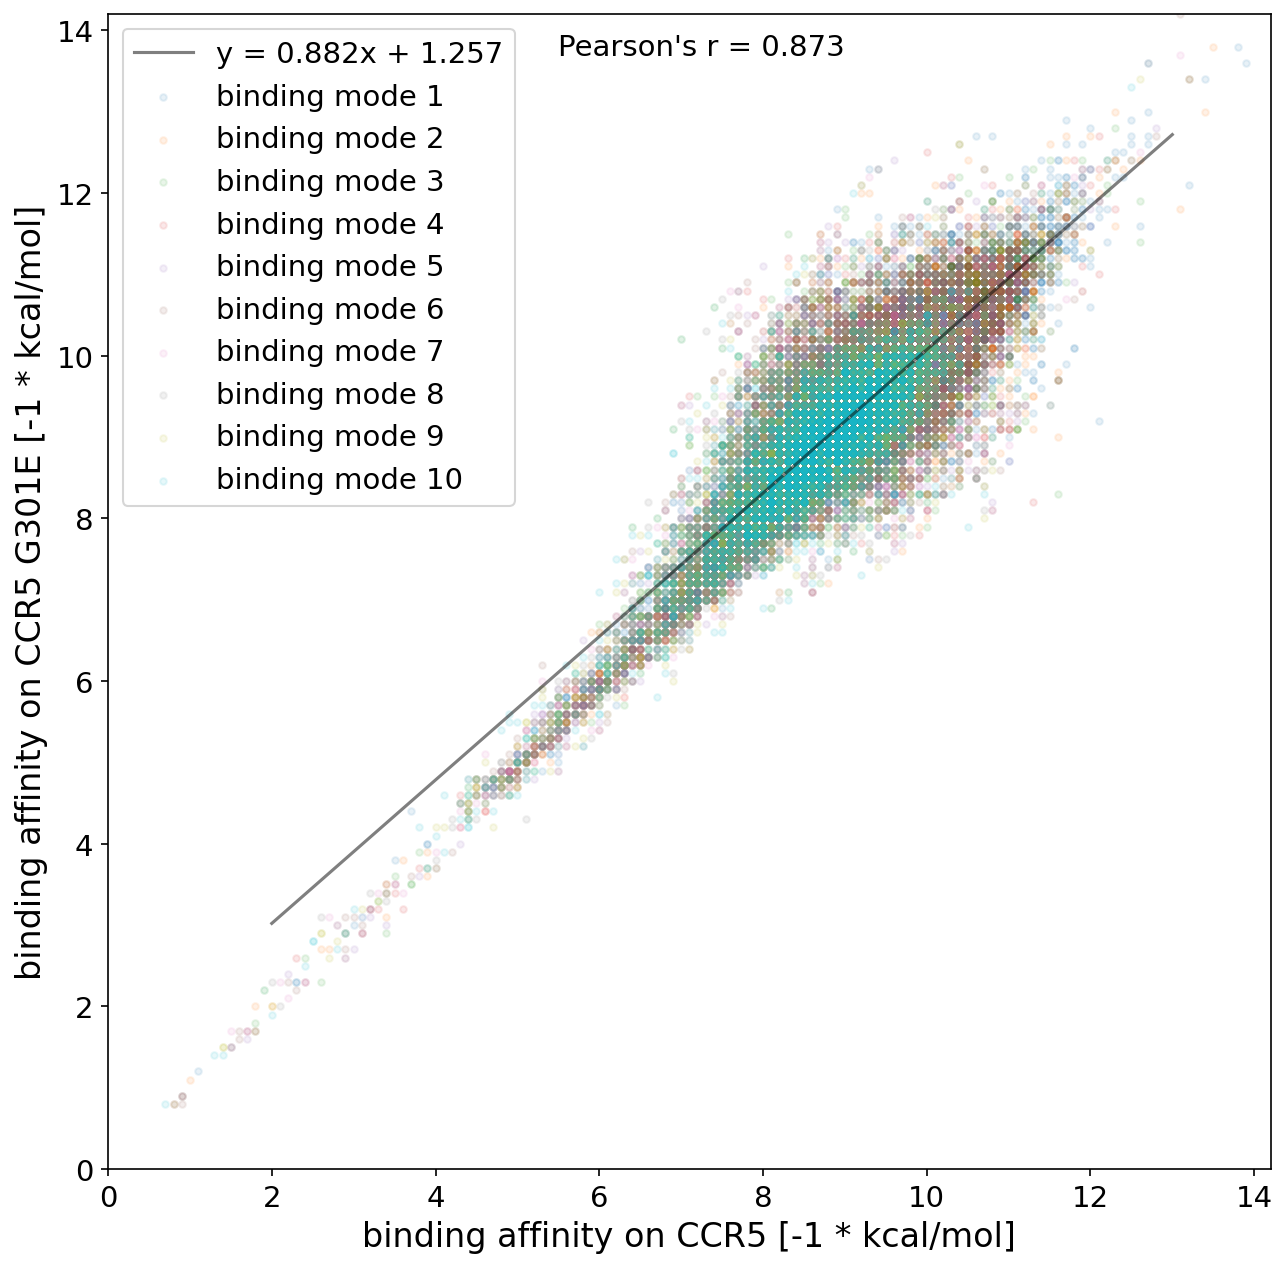

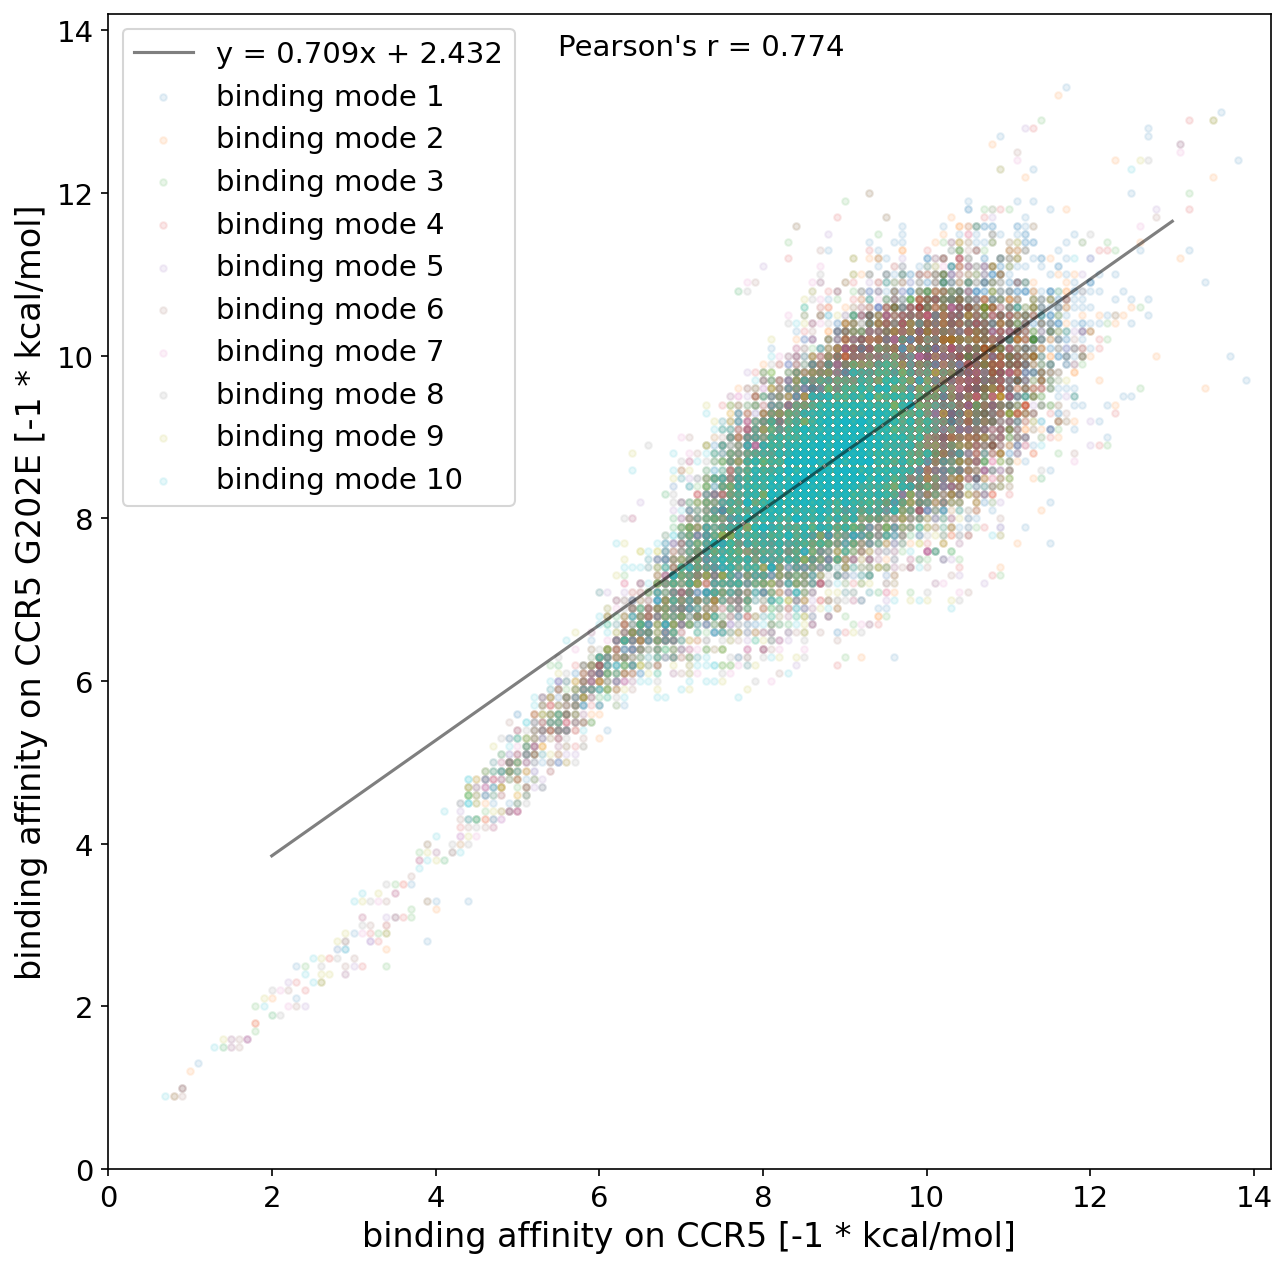

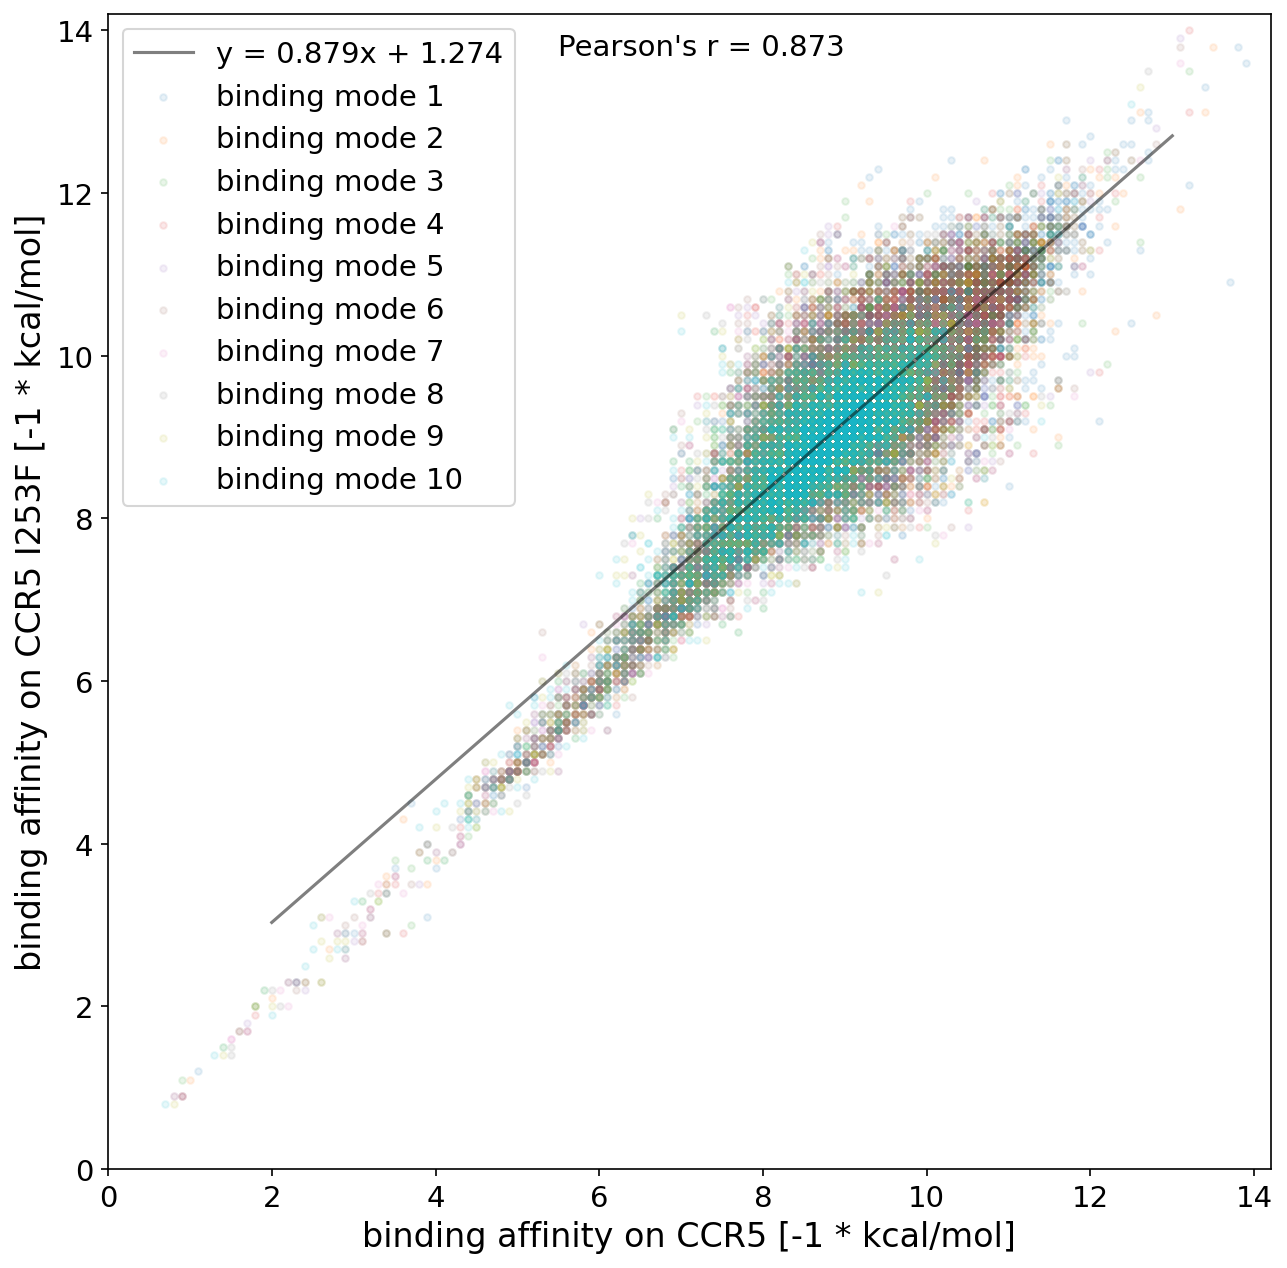

In [20]:
plt.style.use('default')
for variant in ["ccr5_y3d", "ccr5_g301e", "ccr5_g202e", "ccr5_i253f"]:
    combined_logs = pd.merge(logs_ccr5, eval(f"logs_{variant}"), on="uuid")

    plt.figure(figsize=(10, 10), dpi=150)

    x = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_x"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
    y = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_y"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
    idx = x.index.intersection(y.index)
    r = stats.pearsonr(x[idx], y[idx])[0]
    k, b = np.polyfit(x[idx], y[idx], 1)

    for i in range(1, 11):
        plt.scatter(
            combined_logs[f"affin_kcal_mol-1_{i}_x"] * (-1),
            combined_logs[f"affin_kcal_mol-1_{i}_y"] * (-1),
            alpha=0.1, s=10, label=f"binding mode {i}")

    plt.plot(np.arange(2, 14), k*np.arange(2, 14)+ b, color="black", alpha=0.5, label=f"y = {round(k, 3)}x + {round(b, 3)}")
    plt.xlim(0, 14.2)
    plt.ylim(0, 14.2)
    plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]", size=16)
    plt.ylabel(f"binding affinity on {variant.upper().replace('_', ' ')} [-1 * kcal/mol]", size=16)
    plt.legend(fontsize=14)
    plt.text(x=5.5, y=13.7, s=f"Pearson's r = {round(r, 3)}", size=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.savefig(plots_path / f"baff-ccr5-vs-{variant}.png")
    plt.show()

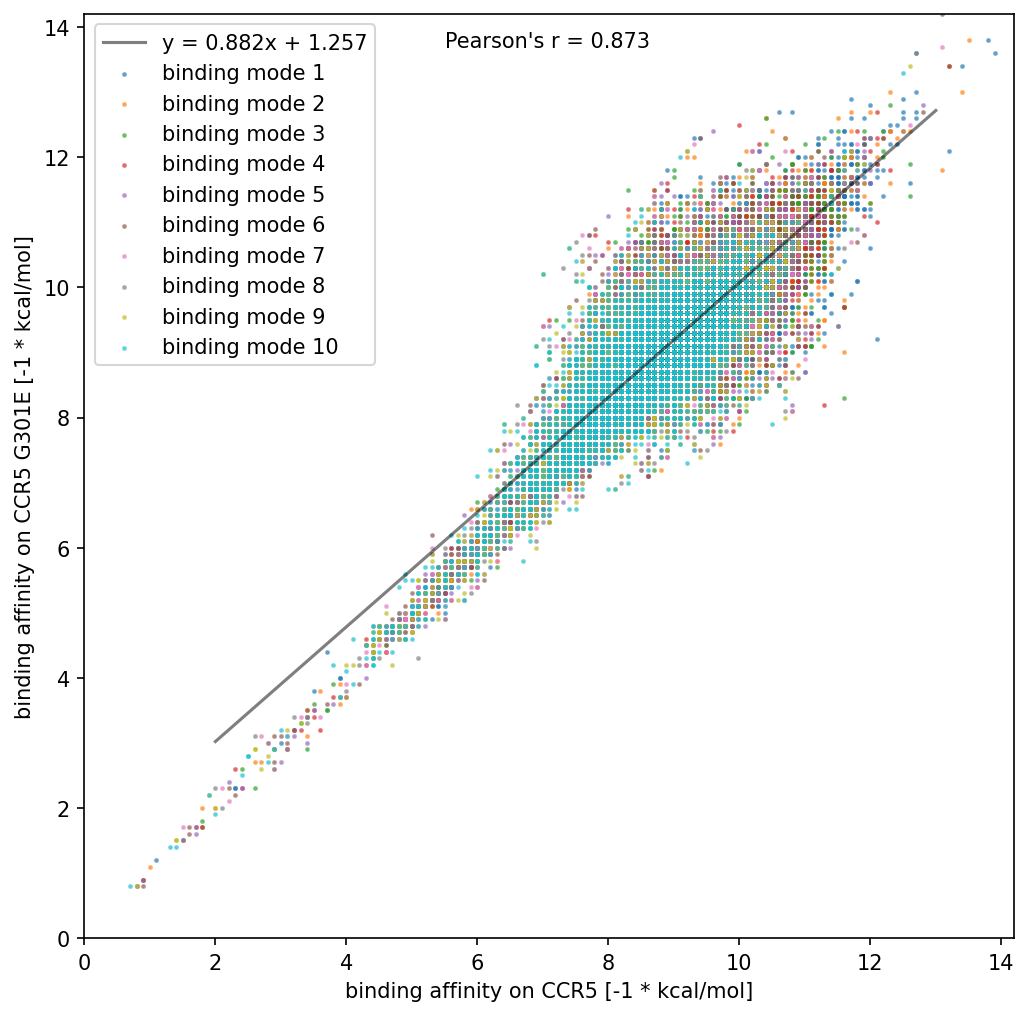

In [14]:
plt.style.use('default')
plt.figure(figsize=(8, 8), dpi=150)

x = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_x"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
y = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
idx = x.index.intersection(y.index)
r = stats.pearsonr(x[idx], y[idx])[0]
k, b = np.polyfit(x[idx], y[idx], 1)

for i in range(1, 11):
    plt.scatter(
        combined_logs[f"affin_kcal_mol-1_{i}_x"] * (-1),
        combined_logs[f"affin_kcal_mol-1_{i}"] * (-1),
        alpha=0.5, s=2, label=f"binding mode {i}")

plt.plot(np.arange(2, 14), k*np.arange(2, 14)+ b, color="black", alpha=0.5, label=f"y = {round(k, 3)}x + {round(b, 3)}")
plt.xlim(0, 14.2)
plt.ylim(0, 14.2)
plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR5 G301E [-1 * kcal/mol]")
plt.legend()
plt.text(x=5.5, y=13.7, s=f"Pearson's r = {round(r, 3)}")
plt.show()